In [25]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf
from tensorflow.keras  import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from keras.models import load_model

In [27]:
DATADIR = "C:\\Users\\priya\\OneDrive\\Desktop\\EXTRACT" 
CATEGORIES = ["ampulla_of_vater", "angiectasia", "blood_fresh", "blood_hematin", "erosion", "erythema", "foreign_body", "ileocecal_valve", "lymphangiectasia", "normal_clean_mucosa", "polyp", "pylorus", "reduced_mucosal_view", "ulcer"]

In [28]:
training_data = []
IMG_SIZE = 128
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Occured:", e)
                pass
            
create_training_data()

In [29]:
# X_train, X_test, y_train, y_test = train_test_split()
import random

random.shuffle(training_data)
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(47238, 128, 128, 1) (47238,)


In [30]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(CATEGORIES[y[index]]) 

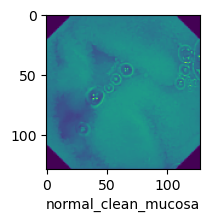

In [31]:
plot_sample(X, y, 321)

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [33]:
cnn = models.Sequential([
        layers.Conv2D(filters = 128, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 256, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2,2)),
    
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(14, activation = 'softmax'),
    ])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs=15)


Epoch 1/15
1034/1034 [==============================] - 2532s 2s/step - loss: 3.3919 - accuracy: 0.7251
Epoch 2/15
1034/1034 [==============================] - 2469s 2s/step - loss: 1.0640 - accuracy: 0.7285
Epoch 3/15
1034/1034 [==============================] - 2461s 2s/step - loss: 1.0028 - accuracy: 0.7354
Epoch 4/15
1034/1034 [==============================] - 2458s 2s/step - loss: 0.9497 - accuracy: 0.7453
Epoch 5/15
1034/1034 [==============================] - 2466s 2s/step - loss: 0.8891 - accuracy: 0.7579
Epoch 6/15
1034/1034 [==============================] - 2418s 2s/step - loss: 0.8334 - accuracy: 0.7703
Epoch 7/15
1034/1034 [==============================] - 2409s 2s/step - loss: 0.7731 - accuracy: 0.7862
Epoch 8/15
1034/1034 [==============================] - 2392s 2s/step - loss: 0.8077 - accuracy: 0.7781
Epoch 9/15
1034/1034 [==============================] - 2382s 2s/step - loss: 0.7181 - accuracy: 0.7994
Epoch 10/15
1034/1034 [==============================] - 2381s 2

In [12]:

cnn.save("network_e1.h5")


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop()  # Define RMSprop optimizer

cnn.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [35]:
cnn.fit(X_train, y_train, epochs=2)


Epoch 1/2
1034/1034 [==============================] - 3252s 3s/step - loss: 12.6192 - accuracy: 0.6795
Epoch 2/2
1034/1034 [==============================] - 2898s 3s/step - loss: 1.0850 - accuracy: 0.7396


In [18]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model


model = load_model("network_e1.h5")


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


report = classification_report(y_test, y_pred_classes, zero_division=1)
print("Classification Report:\n", report)



443/443 [==============================] - 352s 794ms/step - loss: 1.8218 - accuracy: 0.7373
Test Loss: 1.8217859268188477
Test Accuracy: 0.7372989058494568
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      0.33      0.36       264
           2       0.54      0.20      0.29       135
           3       1.00      0.00      0.00         5
           4       0.04      0.02      0.03       149
           5       1.00      0.00      0.00        36
           6       0.43      0.25      0.32       224
           7       0.48      0.35      0.41      1289
           8       0.21      0.04      0.07       180
           9       0.79      0.93      0.85     10291
          10       0.60      0.20      0.30        15
          11       0.37      0.13      0.19       461
          12       0.57      0.10      0.17       874
          13       0.40      0.31      0.35       245

    acc